<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_Team5/blob/JunleeSon/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋
- CementComponent: 콘크리트에 혼합된 시멘트 양
- BlastFurnaceSlag: 콘크리트에 혼합된 고로슬래그 양
- FlyAshComponent: 콘크리트에 혼합된 플라이애쉬 양
- WaterComponent: 콘크리트에 혼합된 물의 양
- SuperplasticizerComponent: 콘크리트에 혼합된 고성능 플라스티서 양
- CoarseAggregateComponent: 콘크리트에 혼합된 거친 골재 양
- FineAggregateComponent: 콘크리트에 혼합된 미세 골재 양
- AgeInDays: 콘크리트가 건조한 일 수
- Strength: 콘크리트의 최종 강도(Target)

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 준비

In [47]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/SeSAC/share/머신러닝/Dataset/Concrete Dataset/train.csv', index_col='id')
test  = pd.read_csv('/content/drive/MyDrive/SeSAC/share/머신러닝/Dataset/Concrete Dataset/test.csv', index_col='id')
submission = pd.read_csv('/content/drive/MyDrive/SeSAC/share/머신러닝/Dataset/Concrete Dataset/sample_submission.csv')

target = 'Strength'

train.shape, test.shape, submission.shape

((5407, 9), (3605, 8), (3605, 2))

In [48]:
# 피처 확인
print( train.columns )
print( test.columns )
# test 데이터에서 'Strength' 누락
print( submission.columns )

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'],
      dtype='object')
Index(['id', 'Strength'], dtype='object')


In [49]:
train.head(2)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,,,,,,,,,
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52


## 결측치 확인

In [50]:
train.info()
# 결측 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 422.4 KB


In [51]:
test.info()
# 결측 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3605 entries, 5407 to 9011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            3605 non-null   float64
 1   BlastFurnaceSlag           3605 non-null   float64
 2   FlyAshComponent            3605 non-null   float64
 3   WaterComponent             3605 non-null   float64
 4   SuperplasticizerComponent  3605 non-null   float64
 5   CoarseAggregateComponent   3605 non-null   float64
 6   FineAggregateComponent     3605 non-null   float64
 7   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 253.5 KB


In [52]:
train.tail(2)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
id,,,,,,,,,
5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61
5406,190.7,0.0,125.2,166.6,7.9,1079.0,770.1,56,63.14


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
# MaxNLocator: 눈금의 위치를 수동으로 지정하지 않고 축 상에 어디에 눈금을 배치할지를 자동으로 결정

%matplotlib inline

## EDA

### 연속형 데이터 시각화

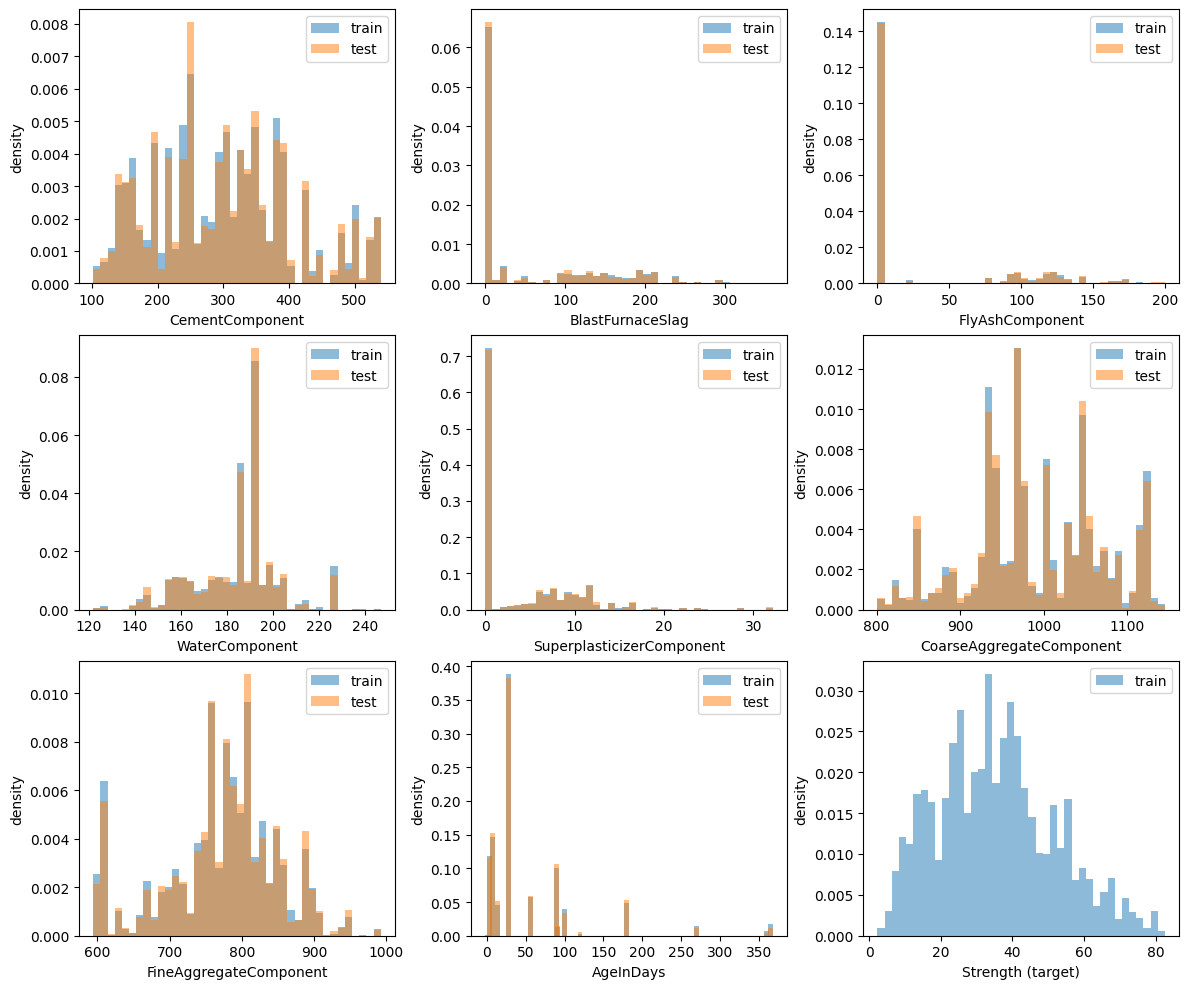

In [54]:
def analyze(train, test, col, ax):
    """Plot a histogram for column col into axes ax"""
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()

_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(train.columns, axs):
    analyze(train, test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()


### 상관관계 분석

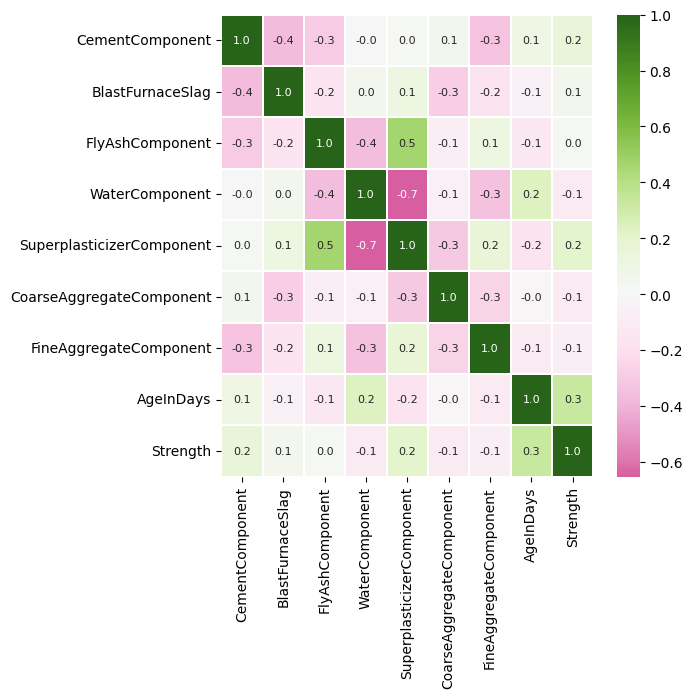

In [55]:
corr = train.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, linewidth=0.1, fmt='.1f',
            annot=True, annot_kws={'size': 8},
            cmap='PiYG', center=0)
plt.show()

# 모델구축-베이스라인

## 피쳐엔지니어링

### 데이터 합치기

In [56]:
train.shape, test.shape

# 2개를 합치면 반드시 결측치가 발생(피처수가 달라서)
# 차후 다시 분해할때는 결측을 기준으로 분해

((5407, 9), (3605, 8))

In [57]:
# 데이터가 늘어나는 구조 => axis=0으로, 1차원으로, 수직으로 합병
# 원데이터 인덱스 무시 : ignore_index
train_test_df = pd.concat( [train, test], ignore_index=True )
train_test_df.shape

(9012, 9)

In [58]:
# 결측은 정답만 존재(테스트데이터), 모든 데이터는 수치화
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            9012 non-null   float64
 1   BlastFurnaceSlag           9012 non-null   float64
 2   FlyAshComponent            9012 non-null   float64
 3   WaterComponent             9012 non-null   float64
 4   SuperplasticizerComponent  9012 non-null   float64
 5   CoarseAggregateComponent   9012 non-null   float64
 6   FineAggregateComponent     9012 non-null   float64
 7   AgeInDays                  9012 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 633.8 KB


### 데이터 나누기 및 학습데이터 준비

In [59]:
X_sub = train_test_df[ pd.isnull( train_test_df['Strength'] ) ] # 테스트용, submission용
X_sub.shape

(3605, 9)

In [60]:
X_sub

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56,NaN
5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7,NaN
5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28,NaN
5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100,NaN
5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,NaN
...,...,...,...,...,...,...,...,...,...
9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28,NaN
9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,NaN
9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28,NaN
9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,NaN


In [61]:
# 훈련용
X = train_test_df[ ~pd.isnull( train_test_df['Strength'] ) ]
X.shape

(5407, 9)

In [62]:
# 훈련용 데이터 준비
y = X['Strength']
X = X.drop( ['Strength'], axis=1 )
# submission용 데이터 준비
X_sub = X_sub.drop( ['Strength'], axis=1 )

X.shape, X_sub.shape, y.shape

((5407, 8), (3605, 8), (5407,))

In [63]:
# 학습에 사용되는 훈련용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4055, 8), (1352, 8), (4055,), (1352,))

## 평가지표 커스텀 함수 생성

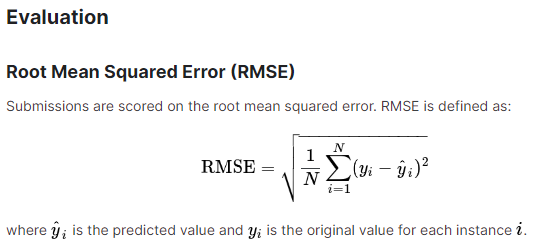

In [64]:
from IPython.display import Image
Image('/content/drive/MyDrive/SeSAC/share/머신러닝/reg/ml_rmse_식.png')

# RMSE는 실제값과 예측값 간의 거리를 나타내는 지표로, 값이 작을수록 모델이 더 정확하게 예측

## 모델생성-학습-예측-제출

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 알고리즘 생성
lr_model = LinearRegression()

# 학습
lr_model.fit( X_train, y_train )

LinearRegression()

In [66]:
# 예측
y_pred = lr_model.predict( X_test )
# 평가
# mse = mean_squared_error( y_test, y_pred )
# rmse
rmse = np.sqrt( mean_squared_error( y_test, y_pred ) )

rmse

14.387870902485204

In [67]:
submission.tail(2)

,id,Strength
3603,9010,35.452
3604,9011,35.452


In [68]:
sub_y_pred = lr_model.predict( X_sub )
submission['Strength'] = sub_y_pred
submission.to_csv( 'submission_v1.csv', index=False )

# 최적화

## 규제 기본 모델 + cv + 그리드 서치 + 하이퍼파라미터

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [70]:
lasso_model = Lasso()
param_grid  = {
    'max_iter':[ 1000, 2000, 3000 ],
    'alpha':1/np.array( [0.01, 0.1, 1, 2, 4, 8, 10, 100, 200, 300] )
}

grid = GridSearchCV(lasso_model, param_grid, cv=5)

# 교차검증
grid.fit( X_train, y_train )

# 베스트
print( grid.best_params_, grid.best_score_ )

{'alpha': 0.0033333333333333335, 'max_iter': 1000} 0.20677739516547183


In [71]:
# 테스트데이터 예측값
y_pred = grid.best_estimator_.predict( X_test )
rmse

14.387870902485204

## 앙상블 모델 + cv + 그리드 서치 + 하이퍼파라미

In [72]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
param_grid  = {
    'n_estimators':[ 100, 120, 140 ],
    'random_state':[ 0, 20, 42]
}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit( X_train, y_train )
print( grid.best_params_, grid.best_score_ )
y_pred = grid.best_estimator_.predict( X_test )
rmse

{'n_estimators': 120, 'random_state': 42} 0.36830104612159614


14.387870902485204

## AutoML - 파이캐럿

In [73]:
# !pip install -q catboost
# !pip install --upgrade -q xgboost
# !pip install -q pycaret
# !pip install fastapi python-multipart uvicorn
# !pip install --upgrade lida
# !pip install --upgrade scipy

### 데이터 풀구성
- 캐글에서만 해볼 수 있는 치트키

In [74]:
X = pd.concat( [X_train, X_test] )
y = pd.concat( [y_train, y_test] )

X.shape, y.shape

((5407, 8), (5407,))

### 모듈 가져오

In [75]:
from pycaret.regression import *

### setup

In [76]:
reg = setup( data=X,
             target= y,
             verbose=True,
             train_size=0.9,
             data_split_shuffle=True,
             normalize=True,
             session_id=100)

,Description,Value
0,Session id,100
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(5407, 9)"
4,Transformed data shape,"(5407, 9)"
5,Transformed train set shape,"(4866, 9)"
6,Transformed test set shape,"(541, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [77]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### top6 후보

In [78]:
top6_models = compare_models( fold=5, round=3, n_select=6, errors='ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.363,148.633,12.187,0.444,0.379,0.355,0.444
catboost,CatBoost Regressor,9.528,154.783,12.437,0.421,0.386,0.359,3.800
lightgbm,Light Gradient Boosting Machine,9.546,155.754,12.476,0.418,0.385,0.358,1.430
ada,AdaBoost Regressor,10.205,161.279,12.696,0.397,0.407,0.413,0.222
rf,Random Forest Regressor,9.931,167.261,12.927,0.375,0.398,0.370,2.272
xgboost,Extreme Gradient Boosting,9.987,169.755,13.024,0.366,0.404,0.374,0.184
et,Extra Trees Regressor,10.290,181.086,13.451,0.323,0.416,0.381,0.828
knn,K Neighbors Regressor,10.652,191.375,13.829,0.285,0.433,0.414,0.064
lar,Least Angle Regression,11.416,212.702,14.582,0.206,0.476,0.495,0.072
lr,Linear Regression,11.416,212.702,14.582,0.206,0.476,0.495,2.174


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

### top 6 알고리즘 확인

In [79]:
top6_models

[GradientBoostingRegressor(random_state=100),
 LGBMRegressor(n_jobs=-1, random_state=100),
 AdaBoostRegressor(random_state=100),
 RandomForestRegressor(n_jobs=-1, random_state=100),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)]

### 블랜딩

In [80]:
reg_blended = blend_models(estimator_list=top6_models, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4669,147.9397,12.1630,0.4396,0.4051,0.3966
1,9.8493,164.3962,12.8217,0.4280,0.3930,0.3706
2,9.5448,151.4277,12.3056,0.4465,0.3869,0.3754
3,9.2243,146.3429,12.0972,0.4306,0.3698,0.3410
4,8.8576,127.0319,11.2708,0.5405,0.3453,0.3243
5,9.3048,145.7365,12.0721,0.4544,0.3705,0.3421
6,10.1303,165.8745,12.8792,0.3999,0.4011,0.3913
7,9.0089,137.1684,11.7119,0.4634,0.3813,0.3620
8,9.5392,157.1801,12.5371,0.3730,0.3821,0.3512


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 최종모델

In [81]:
model = finalize_model( reg_blended )
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'BlastFurnaceSlag',
                                             'FlyAshComponent',
                                             'WaterComponent',
                                             'SuperplasticizerComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'AgeInDays'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transfor...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=100, ...))],
                                 n_jobs=-1))])

### 검증모델

In [82]:
predict_model( model )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,8.1292,104.9103,10.2426,0.6233,0.3624,0.3519


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,prediction_label
92,366.000000,38.000000,0.000000,228.000000,0.0,932.000000,670.000000,365,41.930000,46.671766
5164,158.000000,111.000000,195.000000,220.000000,11.0,898.000000,713.000000,28,67.110001,50.463281
2588,202.500000,136.800003,103.300003,202.500000,7.5,973.900024,775.500000,3,11.480000,18.612376
250,393.000000,0.000000,0.000000,192.000000,0.0,940.000000,758.000000,28,39.299999,39.552905
5197,213.699997,0.000000,174.699997,154.800003,10.2,1053.500000,776.400024,14,21.540001,27.717789
...,...,...,...,...,...,...,...,...,...,...
2779,425.000000,106.300003,0.000000,153.500000,16.5,852.099976,887.099976,7,43.700001,42.055547
4111,168.899994,42.200001,123.800003,140.800003,12.4,1075.699951,792.700012,3,9.990000,16.494775
2681,310.000000,0.000000,0.000000,192.000000,0.0,970.000000,850.000000,90,32.959999,42.792577
1968,277.000000,0.000000,0.000000,191.000000,0.0,968.000000,856.000000,180,41.840000,39.586025


### submission 제출

In [84]:
sub_y_pred = predict_model( model, data = X_sub)
submission['Strength'] = sub_y_pred.prediction_label.values
submission.to_csv('submission_v2.csv', index=False)
# 12.40048